# KNN and Linear Regression Models 
#### Doğukan Soyuyüce

In [35]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


fruits = pd.read_table('../fruit_data_with_colors.txt')

In [3]:
X = fruits[['mass','width','height']]
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
X = fruits[['mass','width','height','color_score']]
y=fruits[['fruit_label']]
X_train , X_test , y_train, y_test  = train_test_split(X,y,random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)

<ipython-input-5-5c9b4b5efe60>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_scaled,y_train)


KNeighborsClassifier()

In [6]:
 score = knn.score(X_test_scaled,y_test)
print("Accuracy of the model is : %" , score*100 )

Accuracy of the model is : % 80.0


In [7]:
score_2 =knn.score(X_train_scaled,y_train)
print("Accuracy of the model is : %" , score_2*100 )

Accuracy of the model is : % 95.45454545454545


In [8]:
example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
example_fruit_scaled

array([[-0.2823741 , -1.05555556,  0.94736842,  0.3030303 ]])

In [9]:
knn.predict(example_fruit_scaled)

array([4], dtype=int64)

<IPython.core.display.Javascript object>


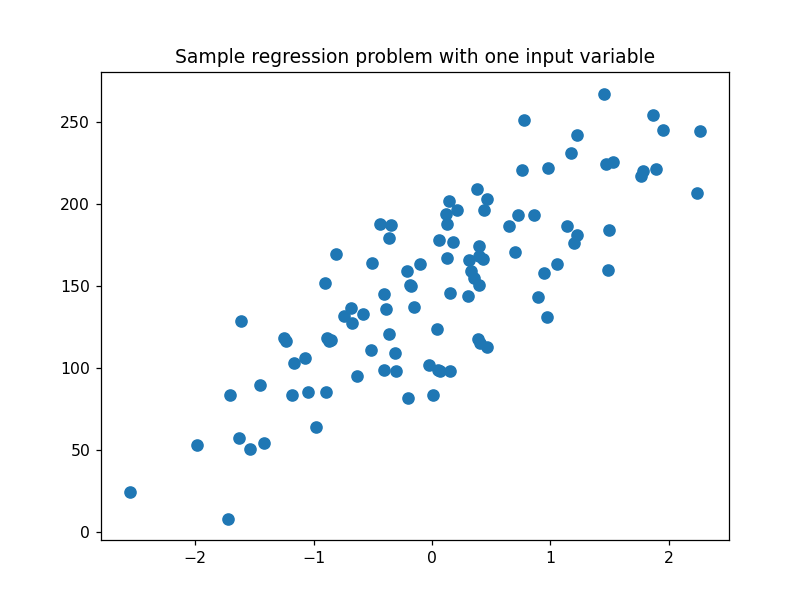

In [10]:
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

X_train , X_test , y_train , y_test = train_test_split(X_R1,y_R1,random_state=0)
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [12]:
print('linear model coeff (w): {}'
     .format(model.coef_))
print('linear model intercept (b): {:.3f}'
     .format(model.intercept_))
print('R-squared score (training): {:.3f}'
     .format(model.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(model.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


<IPython.core.display.Javascript object>


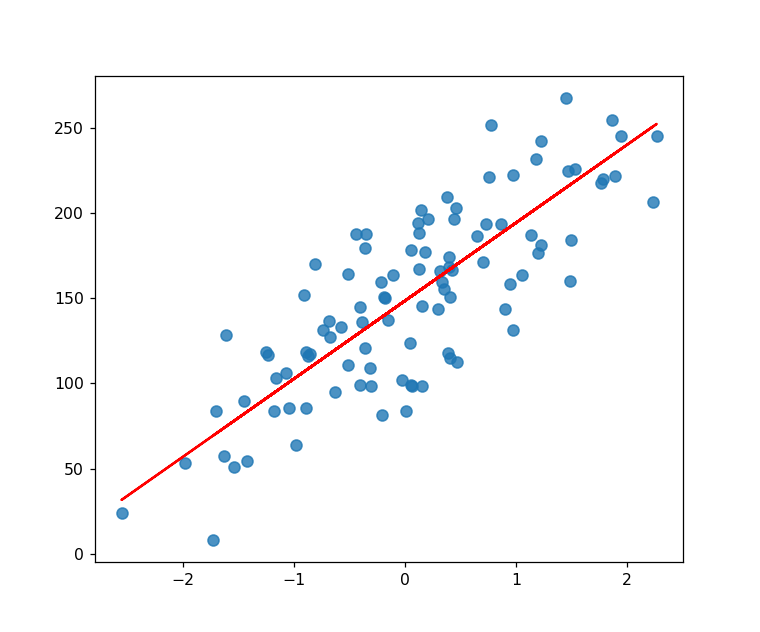

In [13]:
x_axis = model.coef_
bias = model.intercept_
plt.figure(figsize=(6,5))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, x_axis* X_R1 + bias, 'r-')

# Types of Linear Regression !

# Ridge Regression

In [ ]:
# Same dataset will be used 
X_train , X_test , y_train , y_test = train_test_split(X_R1,y_R1,random_state=0)

from sklearn.linear_model import Ridge
rdg = Ridge(alpha=2.0).fit(X_train,y_train)
sc_1 =rdg.score(X_test,y_test)
sc_2 =rdg.score(X_train,y_train)

#Test the ridge regression
print("Score for the test set is : {}".format(sc_1))
print("Score for the train set is : {}".format(sc_2))
print("----------------------------------------------")
#Lets try for different alpha values
for alpha_value in [1.0,2.0,3.0,4.0,5.0,10.0,20.0,60.0]:
    rdg_model = Ridge(alpha=alpha_value).fit(X_train,y_train)
    score_test = rdg_model.score(X_test,y_test)
    score_train =rdg_model.score(X_train,y_train)
    
    print("Score of the model applied on the test set when the alpha value is {} == {}".format(alpha_value,score_test))
    print("Score of the model applied on the test set train set when the alpha value is {} == {}".format(alpha_value,score_train))
    print("################################")


##### I observed that increasing the alpha is not always a efficient way for increasing the accuracy of the model .
##### However when compared to the result of the basic linear regression , increase in the accuracy can be easily observed. 

Score of the model applied on the test set when the alpha value is 1.0 == 0.41873536807863854
Score of the model applied on the test set train set when the alpha value is 1.0 == 0.6419302670030349
################################


<IPython.core.display.Javascript object>


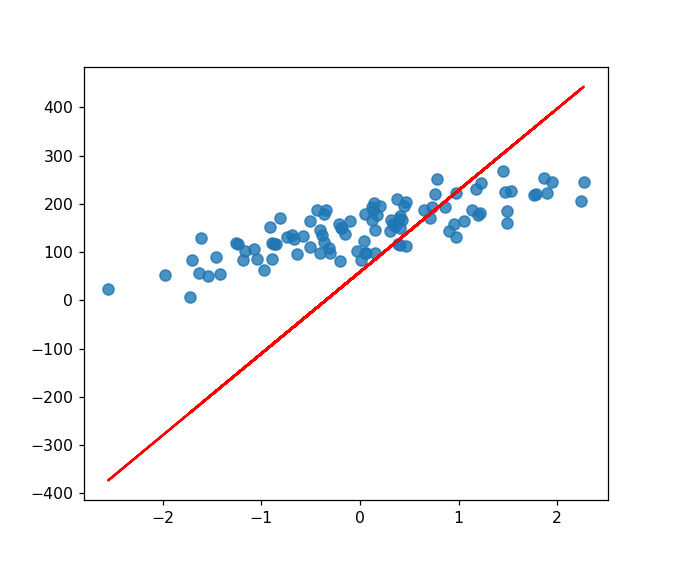

Score of the model applied on the test set when the alpha value is 2.0 == 0.47048703163656047
Score of the model applied on the test set train set when the alpha value is 2.0 == 0.5820401024529167
################################


<IPython.core.display.Javascript object>


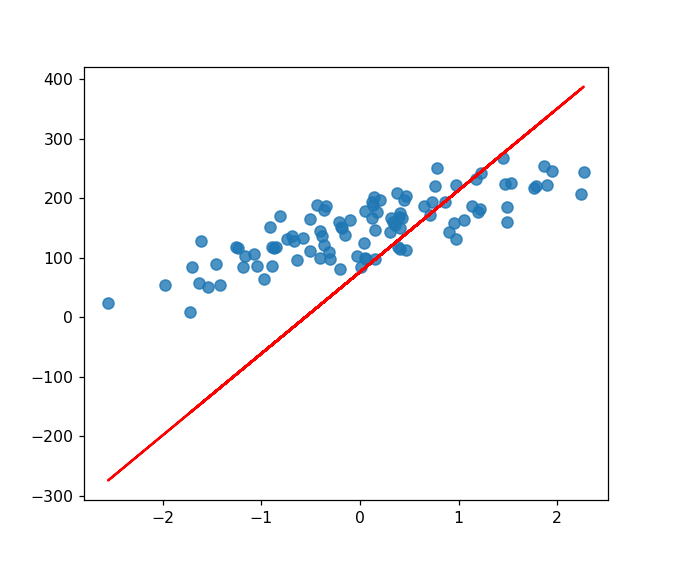

Score of the model applied on the test set when the alpha value is 3.0 == 0.4700826111396089
Score of the model applied on the test set train set when the alpha value is 3.0 == 0.5248212388380071
################################


<IPython.core.display.Javascript object>


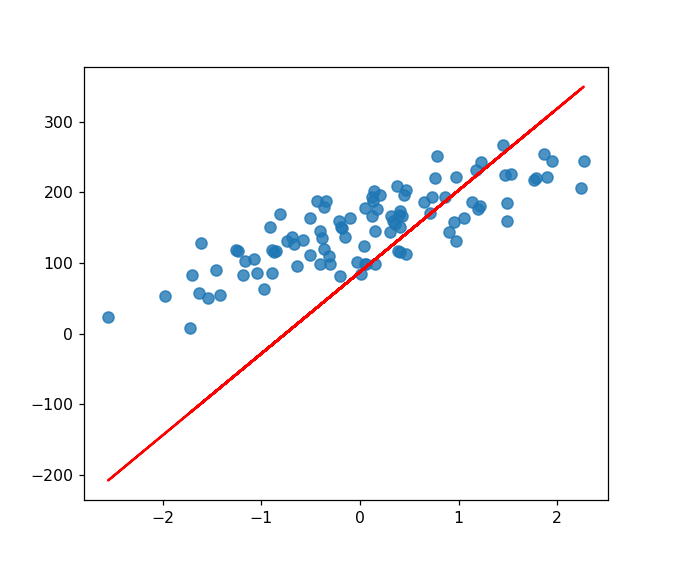

Score of the model applied on the test set when the alpha value is 4.0 == 0.4516198657659901
Score of the model applied on the test set train set when the alpha value is 4.0 == 0.47496825646011553
################################


<IPython.core.display.Javascript object>


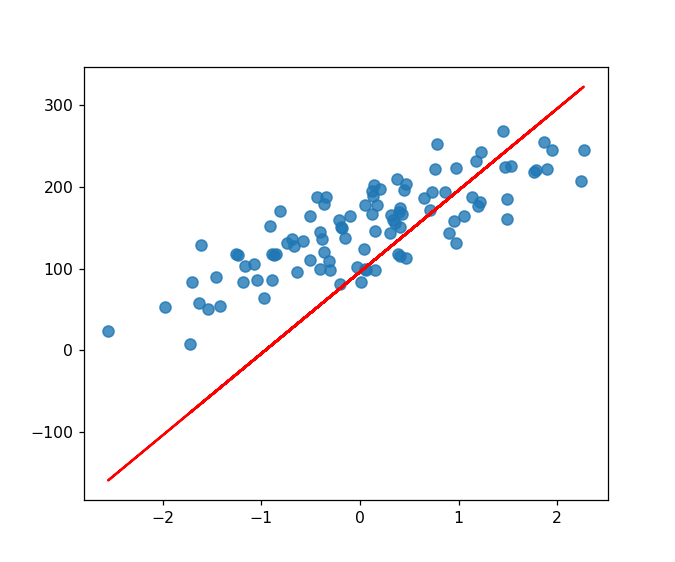

Score of the model applied on the test set when the alpha value is 5.0 == 0.42739890730767927
Score of the model applied on the test set train set when the alpha value is 5.0 == 0.4324593500202901
################################


<IPython.core.display.Javascript object>


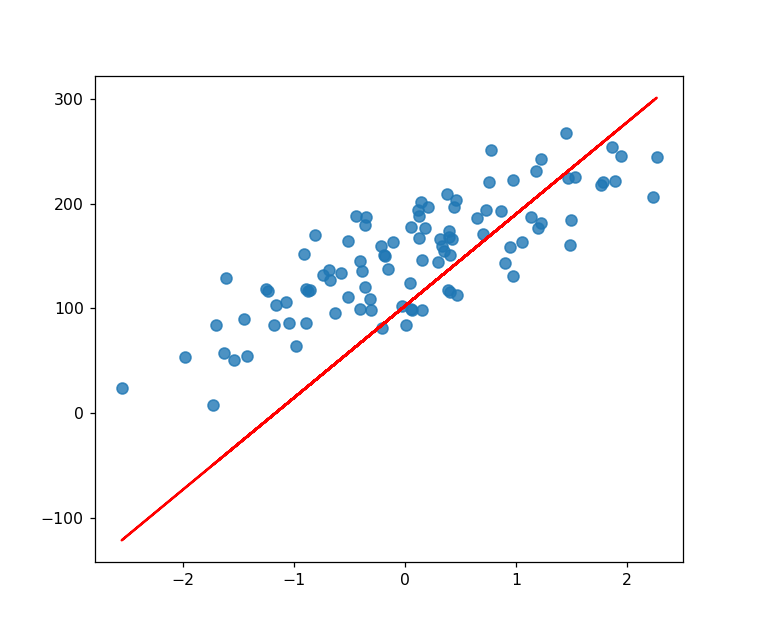

Score of the model applied on the test set when the alpha value is 10.0 == 0.3156526923848164
Score of the model applied on the test set train set when the alpha value is 10.0 == 0.2950908077278207
################################


<IPython.core.display.Javascript object>


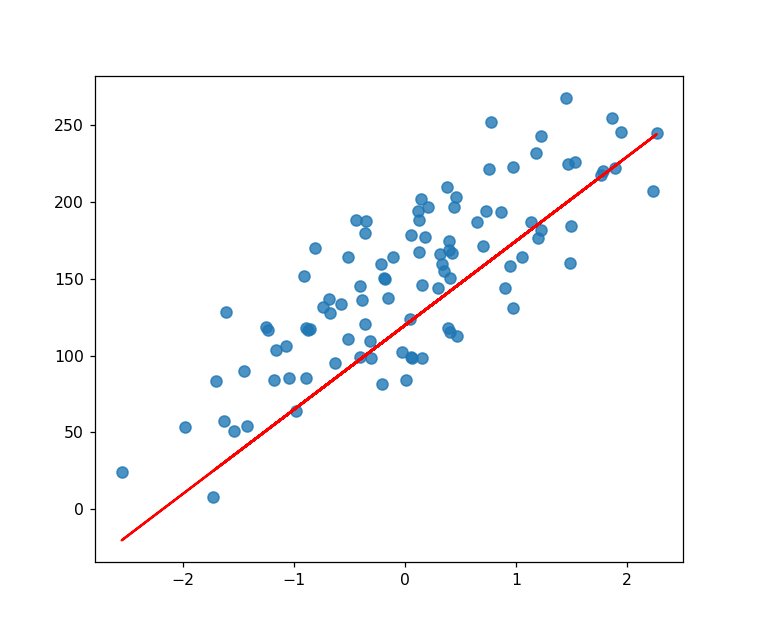

Score of the model applied on the test set when the alpha value is 20.0 == 0.19553864221392658
Score of the model applied on the test set train set when the alpha value is 20.0 == 0.17869808427313139
################################


<IPython.core.display.Javascript object>


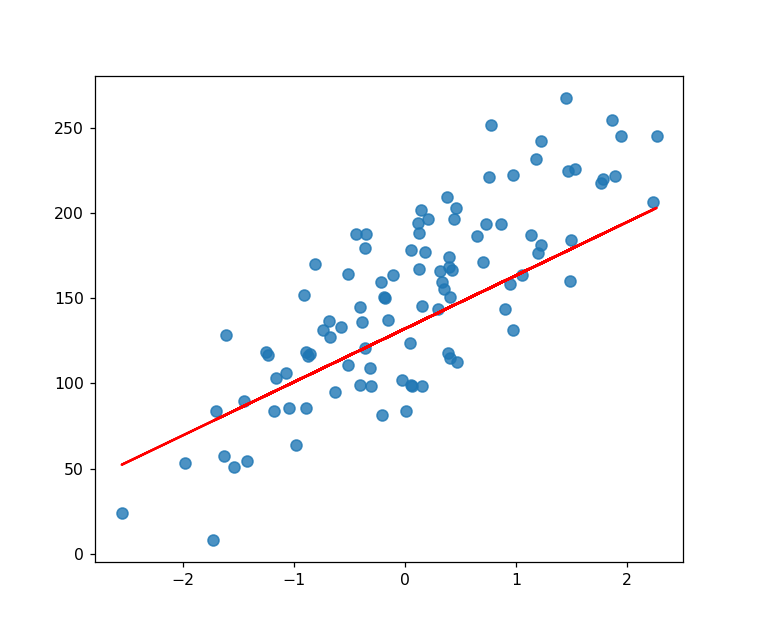

Score of the model applied on the test set when the alpha value is 60.0 == 0.06851492966401185
Score of the model applied on the test set train set when the alpha value is 60.0 == 0.06895016686799271
################################


<IPython.core.display.Javascript object>


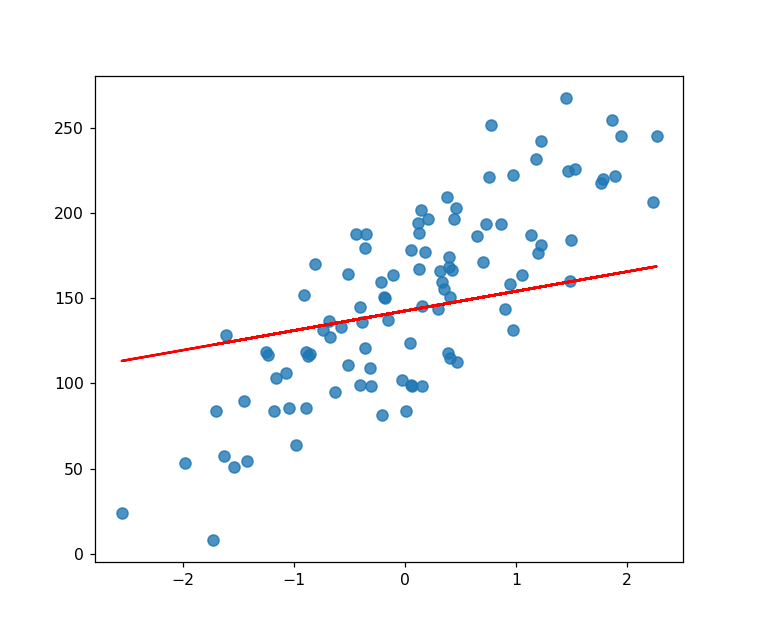

In [34]:
#Lets try the same model on the scaled data and observe the difference !!
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train , X_test , y_train , y_test = train_test_split(X_R1,y_R1,random_state=0)

#Scale the dataset by using the MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

#Create the regression model 
for alpha_value in [1.0,2.0,3.0,4.0,5.0,10.0,20.0,60.0]:
    rdg_model = Ridge(alpha=alpha_value).fit(X_train_scaled,y_train)
    score_test = rdg_model.score(X_test_scaled,y_test)
    score_train =rdg_model.score(X_train_scaled,y_train)
    
    print("Score of the model applied on the test set when the alpha value is {} == {}".format(alpha_value,score_test))
    print("Score of the model applied on the test set train set when the alpha value is {} == {}".format(alpha_value,score_train))
    print("################################")
    #Lets observe the regression model on the dataset.
    x_axis = rdg_model.coef_
    bias = rdg_model.intercept_
    plt.figure(figsize=(6,5))
    plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
    plt.plot(X_R1, x_axis* X_R1 + bias, 'r-')

##### We can observe that normalizing the data might not be useful for every data set.